# Preprocessing OASIS1

In [1]:
# IMPORTS
# DATA MANIPULATION
import pandas as pd
import numpy as np

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import set_config; set_config(display='diagram') # Visualize pipelines in HTML
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree

# MACHINE LEARNING
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [2]:
# Importing Data
oasis1_cs_path = '../raw_data/OASIS1/oasis_cross-sectional.csv'
oasis1 = pd.read_csv(oasis1_cs_path)

In [3]:
# Check shape
oasis1.shape

(436, 12)

Note to self:


**CDR;** 0= nondemented; 0.5 – very mild dementia; 1 = mild dementia; 2 = moderate dementia

**eTIV;** Estimated total intracranial volume (eTIV)

**nWBV** Normalized whole brain volume

**ASF;** Atlas scaling factor

In [4]:
oasis1.sample(20)

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
354,OAS1_0390_MR1,M,R,69,2.0,2.0,24.0,0.5,1480,0.794,1.186,NaN
143,OAS1_0155_MR1,M,R,71,4.0,NaN,28.0,0.5,1359,0.753,1.291,NaN
287,OAS1_0317_MR1,M,R,86,4.0,1.0,26.0,0.0,1501,0.702,1.169,NaN
205,OAS1_0226_MR1,M,R,90,1.0,4.0,23.0,0.5,1668,0.644,1.052,NaN
379,OAS1_0419_MR1,F,R,21,NaN,NaN,NaN,NaN,1473,0.862,1.191,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
425,OAS1_0191_MR2,F,R,21,NaN,NaN,NaN,NaN,1416,0.837,1.239,28.0
266,OAS1_0294_MR1,F,R,20,NaN,NaN,NaN,NaN,1439,0.841,1.220,NaN
24,OAS1_0027_MR1,F,R,43,NaN,NaN,NaN,NaN,1194,0.834,1.470,NaN
126,OAS1_0136_MR1,F,R,24,NaN,NaN,NaN,NaN,1178,0.873,1.489,NaN


## Data Cleaning

In [5]:
def preprocess_data(oasis1):
    """This function removes CDR rows containing NANs, 
    fills SES missing values with status 3,
    encodes Male/Female M/F to 1 and 0,
    and drops columns Delay and Hand."""
    
    oasis1.dropna(subset = ["CDR"], inplace=True)
    oasis1['SES'].fillna(value=3, inplace=True) # Socioeconomic status 3 means that participants went to 'some college'
    oasis1['M/F'].replace({'F':0, 'M':1}, inplace = True) # Replaces M with 1 and Female with 0
    oasis1.drop('Delay', inplace=True, axis=1)
    oasis1.drop('Hand', inplace=True, axis=1)
    
    return oasis1

In [6]:
preprocess_data(oasis1)

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,OAS1_0002_MR1,0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,OAS1_0003_MR1,0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,OAS1_0010_MR1,1,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
9,OAS1_0011_MR1,0,52,3.0,2.0,30.0,0.0,1321,0.827,1.329
...,...,...,...,...,...,...,...,...,...,...
411,OAS1_0453_MR1,0,70,1.0,4.0,29.0,0.5,1295,0.748,1.355
412,OAS1_0454_MR1,0,73,3.0,2.0,23.0,0.5,1536,0.730,1.142
413,OAS1_0455_MR1,0,61,2.0,4.0,28.0,0.0,1354,0.825,1.297
414,OAS1_0456_MR1,1,61,5.0,2.0,30.0,0.0,1637,0.780,1.072


### Testing my code

In [7]:
# Check shape again
oasis1.shape

(235, 10)

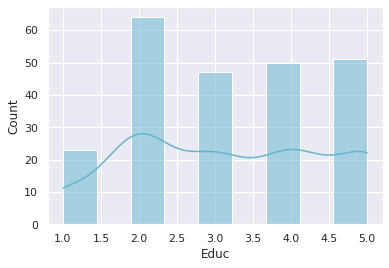

In [8]:
# Education is not normally distrbuted
sns.histplot(oasis1.Educ,kde = True, color = 'c');

In [9]:
# Check whether NANs are still here
oasis1.CDR.unique()

array([0. , 0.5, 1. , 2. ])

In [10]:
# Check SES column
oasis1.SES.unique()

array([3., 1., 2., 4., 5.])

In [11]:
# Check M/F column
oasis1['M/F']

0      0
1      0
2      0
8      1
9      0
      ..
411    0
412    0
413    0
414    1
415    0
Name: M/F, Length: 235, dtype: int64

In [12]:
# def gender_encoding(i):
#     """This function returns 0 for F and 1 for M"""
#     return i.map({'F':0, 'M':1})

## Preprocessing data

In [13]:
# Defining variables
X = oasis1.drop(columns = ['CDR', 'ID'])
y = oasis1['CDR']

In [14]:
# Holdout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Preprocessing pipeline

 Note: columns **nWBV and ASF** already normalized
 
**Columns to scale:**

Standard Scale: age

Robust Scale: eTIV, MMSE

MinMax Scale: Educ

In [15]:
# transformer for numerical features

def numerical_transformer():
    """This function transforms all numerical features according to their respective scalers
    """
    standard_features = ['Age']
    robust_features = ['eTIV', 'MMSE']
    minmax_features = ['Educ']
    numeric_transformer = ColumnTransformer([
        ('standard_scaler', StandardScaler(), standard_features),
        ('robust_scaler', RobustScaler(), robust_features),
        ('minmax_scaler', MinMaxScaler(), minmax_features),
         ], remainder = 'passthrough')
    
    return numeric_transformer
numeric_transformer = numerical_transformer()
numeric_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('standard_scaler', StandardScaler(), ['Age']),
                                ('robust_scaler', RobustScaler(),
                                 ['eTIV', 'MMSE']),
                                ('minmax_scaler', MinMaxScaler(), ['Educ'])])

In [16]:
# transformer for categorical features

categorical_features = ['M/F']
def categorical_transformer():
    """This function encodes all categorical features according to their respective encoder.
    """
    categorical_transformer = ColumnTransformer([
        ('label_encoder', LabelEncoder(), categorical_features)
    ])
    return categorical_transformer
category_transformer = categorical_transformer()

In [17]:
def set_pipeline():
    """This function returns a pipeline
    """
    preproc = Pipeline([('numericals', numeric_transformer)])
    return preproc
set_pipeline()

Pipeline(steps=[('numericals',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_scaler',
                                                  StandardScaler(), ['Age']),
                                                 ('robust_scaler',
                                                  RobustScaler(),
                                                  ['eTIV', 'MMSE']),
                                                 ('minmax_scaler',
                                                  MinMaxScaler(),
                                                  ['Educ'])]))])

In [18]:
def preproc_df():
    """This function returns a scaled dataframe ready for processing
    """
    # Instantiating pipeline
    pipeline = set_pipeline()
    oasis1_scaled = pd.DataFrame(pipeline.fit_transform(X_train, y_train), columns = set_pipeline().get_feature_names_out())
    oasis1_scaled.rename(columns={
                                 'remainder__M/F': 'M/F',
                                 'remainder__SES': 'SES',
                                 'remainder__nWBV': 'nWBV',
                                 'remainder__ASF': 'ASF',
                                 'standard_scaler__Age': 'Age',
                                 'robust_scaler__eTIV': 'eTIV',
                                 'robust_scaler__MMSE': 'MMSE',
                                 'minmax_scaler__Educ': 'Educ'
    }, inplace=True)
    oasis1_scaled = oasis1_scaled[["M/F", "Age", "Educ", "SES", "MMSE", "eTIV", "nWBV", "ASF"]]
    return oasis1_scaled
preproc_df()

,M/F,Age,Educ,SES,MMSE,eTIV,nWBV,ASF
0,0.0,0.781935,1.00,2.0,-0.75,-1.350746,0.743,1.495
1,0.0,-1.128308,0.25,2.0,0.25,-0.136816,0.821,1.238
2,0.0,0.034449,0.50,3.0,-0.25,0.330846,0.779,1.161
3,0.0,0.117503,0.00,4.0,0.25,0.146766,0.721,1.190
4,1.0,0.781935,0.00,4.0,-0.25,1.514925,0.676,1.003
...,...,...,...,...,...,...,...,...
171,1.0,-0.629984,0.25,4.0,0.00,0.574627,0.801,1.124
172,0.0,0.034449,0.75,3.0,-1.25,-0.455224,0.738,1.296
173,0.0,0.200557,0.25,3.0,-0.75,-1.365672,0.736,1.499
174,0.0,-1.460525,0.75,1.0,0.25,0.241294,0.838,1.174


# Decision Tree

## Trial (just to practice)

In [19]:
# Defining new X_scaled
X_scaled = preproc_df()

# Making a copy of X_scaled
X_scaled_test = X_scaled.copy()

In [20]:
y_train.unique()

array([0.5, 0. , 1. ])

In [21]:
y_train_test = y_train.copy()
y_train_test = y_train_test.replace({0.:1, 0.5:2})
y_train_test.shape

(176,)

In [22]:
y_train.unique()
#y_train.replace({0: 'nondemented', 0.5: 'verymild', 1: 'mild', 2: 'moderate'})

array([0.5, 0. , 1. ])

In [23]:
# Instantiate Decision Tree
tree_clf = DecisionTreeClassifier(max_depth = 3)

In [24]:
tree_clf.fit(X_scaled_test,y_train_test)

DecisionTreeClassifier(max_depth=3)

In [25]:
prediction = tree_clf.predict(X_test)
prediction

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2.])

In [26]:
y_test = y_test.replace({0.:1, 0.5:2})

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.4067796610169492

In [28]:
X_test.shape

(59, 8)

In [29]:
X_scaled_test.shape

(176, 8)

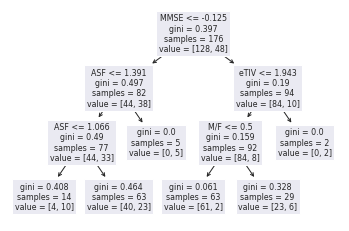

<Figure size 1440x1872 with 0 Axes>

In [30]:
from sklearn import tree
tree.plot_tree(tree_clf,
              feature_names = X_train.columns)
plt.figure(figsize = (20, 26));

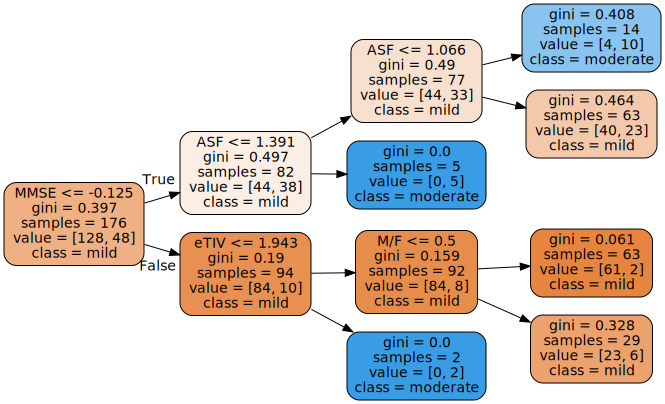

In [31]:
# Export model graph
export_graphviz(tree_clf, out_file="oasis1_tree.dot", 
                feature_names=X_scaled_test.columns,
                class_names=['mild', 'moderate'], 
                rounded=True, filled=True, rotate = True, fontname = 'futura')

# Import model graph
with open("oasis1_tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))